In [1]:
import uproot

In [2]:
rtfile = uproot.open("data/mWPilot/ZJToMuMu_mWPilot_TuneCP5_13TeV-powheg-MiNNLO-pythia8-photos_NanoGen_1.root")

In [3]:
df = rtfile["Events"].pandas.df(["LHEPart*","genWeight"], flatten=False)

In [4]:
df.head(3)

,LHEPart_pt,LHEPart_eta,LHEPart_phi,LHEPart_mass,LHEPart_pdgId,genWeight
entry,,,,,,
0,"[30.903091, 24.801176, 10.126861, 9.532549]","[-3.557411, -1.2928073, -3.5060477, -3.2213554]","[-2.4285138, 0.025982028, 1.7023908, 1.5802811]","[0.10566822, 0.10569724, 0.002640062, 0.002845...","[13, -13, 21, 21]",2624.360107
1,"[14.922913, 33.195957, 12.762807, 13.150437]","[-0.14027546, -2.1633391, -2.1444392, -5.5089087]","[-1.7829586, 0.5572911, -2.7858038, 3.0290399]","[0.10569985, 0.10559314, -0.0007272569, -0.023...","[13, -13, 21, 21]",2624.360107
2,"[26.813852, 25.535078, 13.718618, 3.4002266]","[-0.25951165, -2.5569708, -4.0921917, 2.787839]","[3.052921, 0.31495643, -1.2326318, 2.2446449]","[0.1056998, 0.105762035, 0.0036961955, 0.00052...","[13, -13, 21, -1]",2624.360107


In [5]:
nominalw = float(df["genWeight"].mode())

In [7]:
import matplotlib.pyplot as plt

In [15]:
from uproot_methods import TLorentzVector

In [82]:
df["mu1idx"] = df.apply(lambda x: 0 if x["LHEPart_pt"][0] > x["LHEPart_pt"][1] else 1, axis=1)
df["mu2idx"] = df.apply(lambda x: 1 if x["LHEPart_pt"][0] > x["LHEPart_pt"][1] else 0, axis=1)

In [83]:
df["mu1"] = df.apply(lambda x: TLorentzVector.from_ptetaphim(x["LHEPart_pt"][x["mu1idx"]], x["LHEPart_eta"][x["mu1idx"]], x["LHEPart_phi"][x["mu1idx"]], x["LHEPart_mass"][x["mu1idx"]]), axis=1)
df["mu2"] = df.apply(lambda x: TLorentzVector.from_ptetaphim(x["LHEPart_pt"][x["mu2idx"]], x["LHEPart_eta"][x["mu2idx"]], x["LHEPart_phi"][x["mu2idx"]], x["LHEPart_mass"][x["mu2idx"]]), axis=1)

In [86]:
df["pZ"] = df["mu1"] + df["mu2"]

In [87]:
df["yZ"] = df.apply(lambda x: x["pZ"].rapidity, axis=1)
df["ptZ"] = df.apply(lambda x: x["pZ"].pt, axis=1)
df["ptmu1"] = df.apply(lambda x: x["mu1"].pt, axis=1)
df["etamu1"] = df.apply(lambda x: x["mu1"].eta, axis=1)
df["ptmu2"] = df.apply(lambda x: x["mu2"].pt, axis=1)
df["etamu2"] = df.apply(lambda x: x["mu2"].eta, axis=1)

In [89]:
df["NormAbsGenWeight"] = abs(df["genWeight"])/nominalw

In [90]:
df_filt = df[(abs(df["genWeight"])-nominalw)/nominalw > 0.01].copy(deep=True)
df_filt.head()

,LHEPart_pt,LHEPart_eta,LHEPart_phi,LHEPart_mass,LHEPart_pdgId,genWeight,mu1idx,mu2idx,mu1,mu2,pZ,yZ,ptZ,ptmu1,etamu1,ptmu2,etamu2,NormAbsGenWeight
entry,,,,,,,,,,,,,,,,,,
18,"[33.090107, 35.286182, 3.5647545, 3.9084585]","[2.5076802, 0.9720598, -0.81025046, -5.278893]","[-0.096453495, -3.0659215, 0.59848917, 1.7498925]","[0.10566151, 0.10569675, -4.6691897e-05, 0.001...","[13, -13, -2, 21]",-2722.629883,1,0,"TLorentzVector(35.286, 0.97206, -3.0659, 0.1057)","TLorentzVector(33.09, 2.5077, -0.096453, 0.10566)","TLorentzVector(-2.2489, -5.8543, 241.73, 257.77)",1.719126,6.271401,35.286182,0.972060,33.090107,2.507680,1.037445
48,"[41.810722, 37.049107, 23.092834, 8.678236]","[2.9927595, 2.7645185, -4.603598, 4.8588624]","[-1.3886402, 1.4055235, 2.8188076, -0.32250807]","[0.105441265, 0.1055967, 0.025942164, 0.004892...","[13, -13, 2, 2]",4266.350098,0,1,"TLorentzVector(41.811, 2.9928, -1.3886, 0.10544)","TLorentzVector(37.049, 2.7645, 1.4055, 0.1056)","TLorentzVector(13.669, -4.5747, 708.66, 713.09)",2.885496,14.414600,41.810722,2.992759,37.049107,2.764518,1.625673
50,"[40.181534, 40.667107, 0.7588111]","[1.0845942, 0.10189554, 6.853587]","[0.7461427, -2.3810248, 1.6297882]","[0.105699874, 0.10570107, -0.005876068]","[13, -13, 21]",2682.320068,1,0,"TLorentzVector(40.667, 0.1019, -2.381, 0.1057)","TLorentzVector(40.182, 1.0846, 0.74614, 0.1057)","TLorentzVector(0.044741, -0.75749, 56.793, 107.1)",0.590509,0.758814,40.667107,0.101896,40.181534,1.084594,1.022085
58,"[29.010303, 30.190462, 2.3031387, 1.2752542]","[-3.159257, -5.020298, -0.8731823, -0.14827591]","[2.3041706, -0.8835601, 0.8388475, 3.0853229]","[0.10571888, 0.11178248, 7.142658e-05, -1.8527...","[13, -13, 2, 21]",3997.139893,1,0,"TLorentzVector(30.19, -5.0203, -0.88356, 0.11178)","TLorentzVector(29.01, -3.1593, 2.3042, 0.10572)","TLorentzVector(-0.266, -1.785, -2627.2, 2628.6)",-4.104341,1.804675,30.190462,-5.020298,29.010303,-3.159257,1.523091
64,"[23.2739, 22.091331, 25.424812, 9.581957]","[-1.1621165, -2.443084, 3.189982, 1.3109818]","[-2.8517795, -0.44892836, 1.2641567, -2.153613]","[0.10570022, 0.10562226, -0.0027977522, 0.0002...","[13, -13, 21, 2]",15982.599609,0,1,"TLorentzVector(23.274, -1.1621, -2.8518, 0.1057)","TLorentzVector(22.091, -2.4431, -0.44893, 0.10...","TLorentzVector(-2.401, -16.239, -159.72, 168.92)",-1.787855,16.415237,23.273899,-1.162117,22.091331,-2.443084,6.090094


In [96]:
df_filtnom = df[(abs(df["genWeight"])-nominalw)/nominalw < 0.01].copy(deep=True)

In [ ]:
plt.hist(df_filt["genWeight"]/nominalw, bins=[-10+i*0.1 for i in range(0,200)])
plt.show()

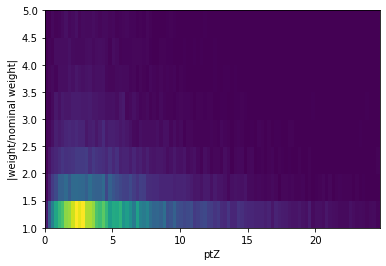

In [75]:
hist = plt.hist2d(df_filt["ptZ"], df_filt["NormAbsGenWeight"], bins=([0.25*i for i in range(100)], [1+0.5*i for i in range(9)]))
plt.xlabel("ptZ")
plt.ylabel("|weight/nominal weight|")
plt.show()

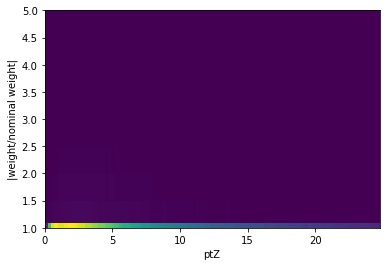

In [95]:
hist = plt.hist2d(df["ptZ"], df["NormAbsGenWeight"], bins=([0.25*i for i in range(100)], [1.0,1.1]+[1+0.5*i for i in range(1,9)]))
plt.xlabel("ptZ")
plt.ylabel("|weight/nominal weight|")
plt.show()

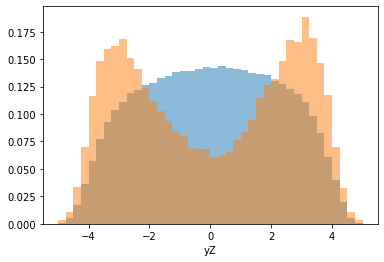

In [109]:
hist = plt.hist(df_filtnom["yZ"], bins=([-5+0.25*i for i in range(41)]), alpha=0.5, label="unit weight", density=True)
hist = plt.hist(df_filt["yZ"], bins=([-5+0.25*i for i in range(41)]), alpha=0.5, label="non-unit weight", density=True)
plt.xlabel("yZ")
plt.show()

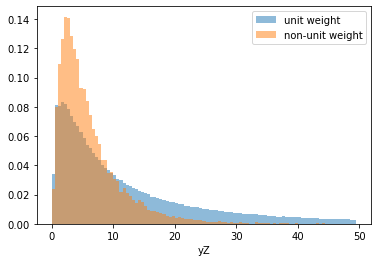

In [107]:
histnom = plt.hist(df_filtnom["ptZ"], bins=([0.5*i for i in range(100)]), density=True, alpha=0.5, label="unit weight")
histlarge = plt.hist(df_filt["ptZ"], bins=([0.5*i for i in range(100)]), density=True, alpha=0.5, label="non-unit weight")
plt.legend()
plt.xlabel("yZ")
plt.show()

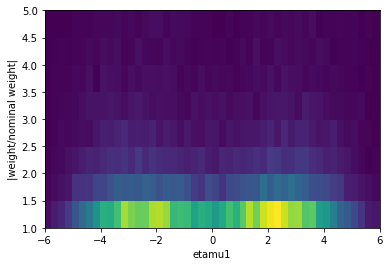

In [77]:
hist = plt.hist2d(df_filt["etamu1"], df_filt["NormAbsGenWeight"], bins=([-6+0.25*i for i in range(49)], [1+0.5*i for i in range(9)]))
plt.xlabel("etamu1")
plt.ylabel("|weight/nominal weight|")
plt.show()

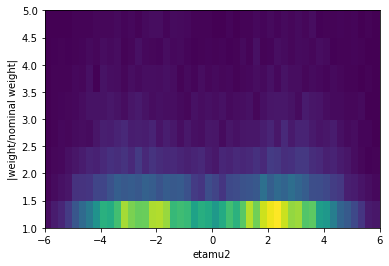

In [78]:
hist = plt.hist2d(df_filt["etamu1"], df_filt["NormAbsGenWeight"], bins=([-6+0.25*i for i in range(49)], [1+0.5*i for i in range(9)]))
plt.xlabel("etamu2")
plt.ylabel("|weight/nominal weight|")
plt.show()

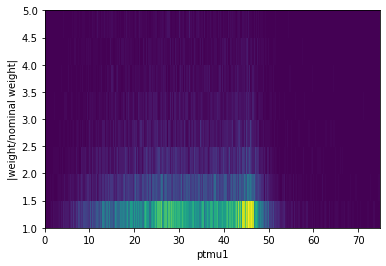

In [80]:
hist = plt.hist2d(df_filt["ptmu1"], df_filt["NormAbsGenWeight"], bins=([0.25*i for i in range(300)], [1+0.5*i for i in range(9)]))
plt.xlabel("ptmu1")
plt.ylabel("|weight/nominal weight|")
plt.show()

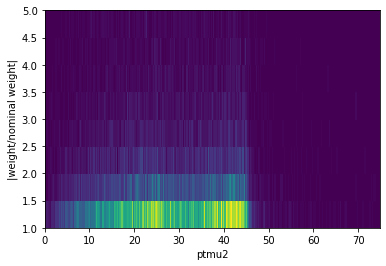

In [81]:
hist = plt.hist2d(df_filt["ptmu2"], df_filt["NormAbsGenWeight"], bins=([0.25*i for i in range(300)], [1+0.5*i for i in range(9)]))
plt.xlabel("ptmu2")
plt.ylabel("|weight/nominal weight|")
plt.show()